# Plotting for Exploratory data analysis (EDA)

## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



## Enviroment Configutaion
Import the required packages and load the data set.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")
iris.head() # just printing only fewer values.

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Number of data-points and features
print (iris.shape)

(150, 5)


In [41]:
#What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [19]:
#How many data points for each class are present? (or) How many flowers for each species are present?

iris["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

**Observations**
1. There are no missing values in this data set. So there is no need to do data imputation.
2. The flowers fall in to one of the three categories, Versicolor, Virginica and Setosa
3. Iris is a balanced dataset as the number of data points for every class is 50.

# Bi-Variate Analysis

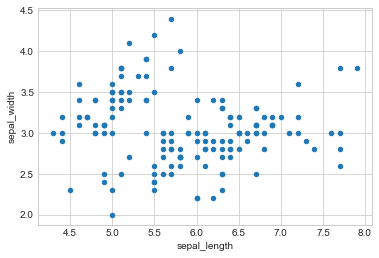

In [20]:
#Draw 2-D scatter plot by picking two features, sepal_length and sepal_width

iris.plot(kind='scatter', x='sepal_length', y='sepal_width');
plt.show()

**Observations**
1. Cannot make much sense out it. 
2. What if we color the points by thier class-label/flower-type.

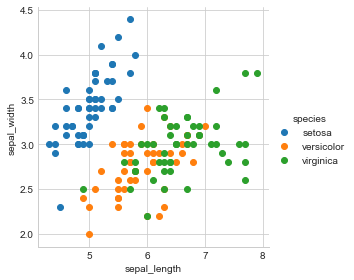

In [21]:
# Use Seaborn to draw 2-D Scatter plot with color-coding for each flower type/class.
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

**Observation(s):**
1. Notice that the blue points can be easily seperated from red and green by drawing a line. But red and green data points cannot be easily seperated.
2. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
3. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

#  Bi-Variate Analysis (Pair-plot)

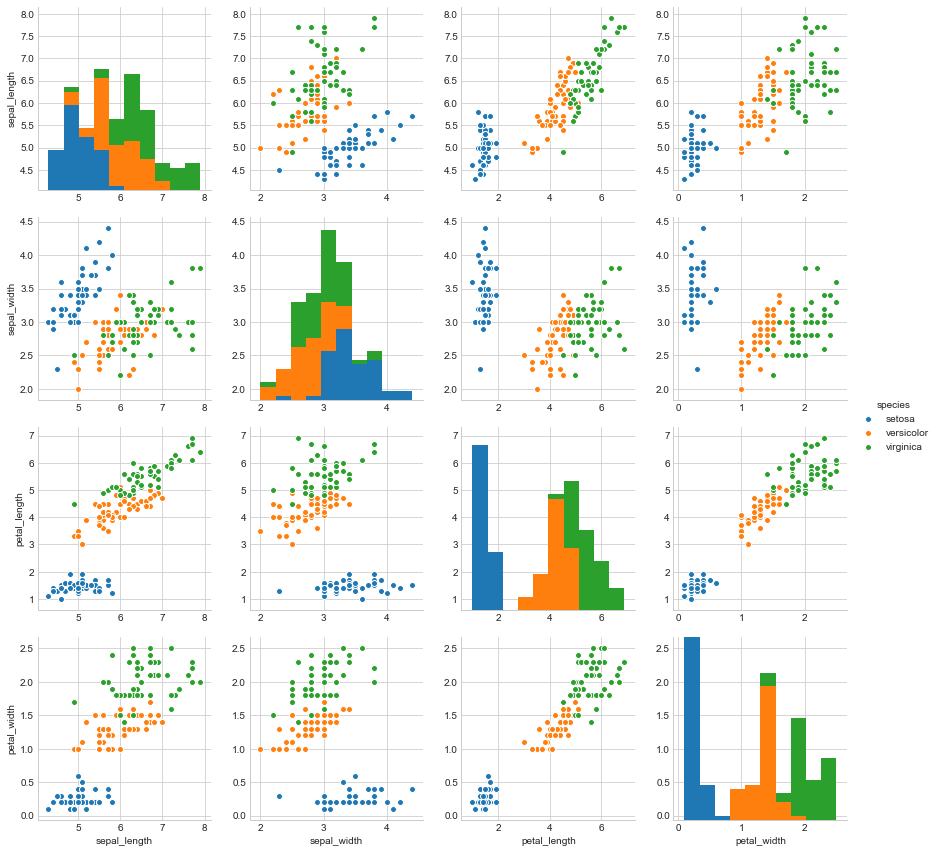

In [42]:
# Draw pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.
4. The diagnol elements are PDFs for each feature.

# Univariate analysis

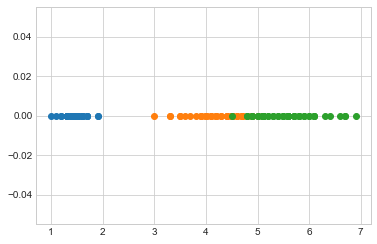

In [23]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()

**Observations:**
1. With 1-D scatter plot, Seems very hard to make sense as points are overlapping a lot.

# Univariate analysis (Histogram, PDF)

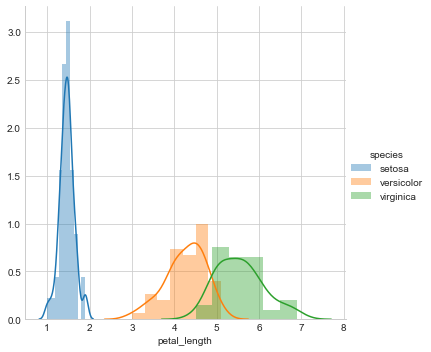

In [24]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

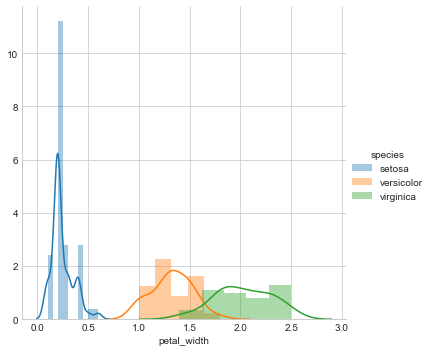

In [25]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

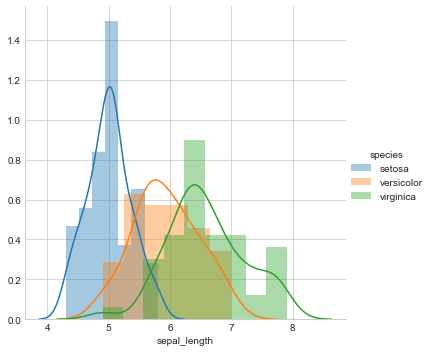

In [26]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

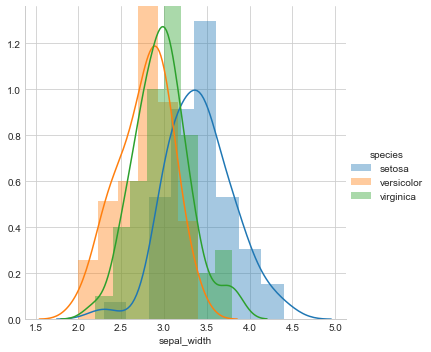

In [27]:
sns.FacetGrid(iris, hue="species", size=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

**Observations**
1. From the Probability Density Functions, we can seee that Petal length and Petal width can separate the Setosa flowers.
2. Sepal length and Sepal Width have considerable overlap and cannot distinguish either flower types with a simple model.
3. Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa. Using just one feature, we can build a simple "model" using if..else... statements.

# Univariate analysis (CDF)

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


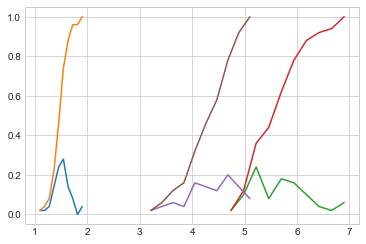

In [45]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# High Level Statistics: Mean, Variance and Std-dev

In [46]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


**Observations**
1. Setosa is clearly separable from other flower types
2. The distribution of Setosa is comparitively smaller than Versicolor and Verginica

# Median, Percentile, Quantile, IQR, MAD

In [47]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))

print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))


Medians:
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box plot and Whiskers

C:\Users\lkalaval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


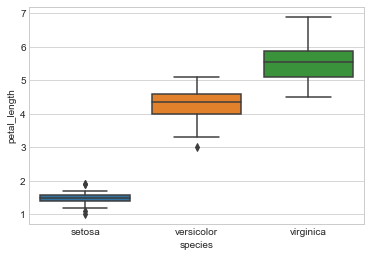

In [48]:
# Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

**Observations:**
1. Above plot uses a technique called inter-quartile range to plot the whiskers. 
2. Whiskers in the plot above donot correposnd to the min and max values.


# Violin plots

C:\Users\lkalaval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\lkalaval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


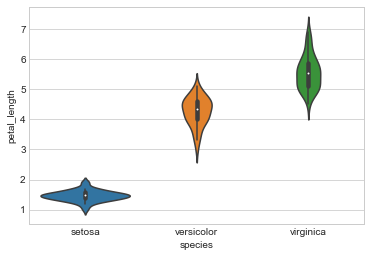

In [49]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

**Observations:**
1. The petal lengths for setosa flower are highly dense near 1.5
2. The petal lengths for versicolor flower are highly dense between 4.4 and 4.6
3. The petal lengths for verginica flower are highly dense between 5.1 and 5.7.